In [58]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy


# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
    get_color,
    replace_column_content,
    make_vertical_grouped_chart,
    make_horizontal_grouped_chart,
    make_horizontal_bar,
    make_custom_horizontal_bar,
    get_normal_uniques_col_count,
    get_percentage,
    make_normalized_df,
    get_uniques_col_count,
)


%matplotlib inline

In [59]:
plt.rcParams["figure.figsize"] = [12, 7]

In [60]:
sns.set()
sns.set_palette("pastel")

In [61]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [62]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [63]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

# HELPER FUNCTIONS 

In [64]:
def show_colors():
    print(
        """
    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)
"""
    )

In [65]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



# SUELDOS
- Sueldos percibidos por los devs que contestaron las preguntas.

## SEGUN GENERO

In [66]:
genero = df.groupby("genero")

In [67]:
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object', name='genero')

### HOMBRES

In [68]:
genero.get_group("HOMBRE")["salario_mensual"].value_counts()

salario_mensual
5 a 7 M. Gs.           48
7 a 9 M. Gs.           41
9 a 12 M. Gs.          37
3.5 a 5 M. Gs.         37
MINIMO a 3.5 M. Gs.    31
12 a 15 M. Gs.         23
< MINIMO Gs.           13
15 a 18 M. Gs.         13
> 27 M. Gs.            13
21 a 24 M. Gs.          7
MINIMO                  6
18 a 21 M. Gs.          6
24 a 27 M. Gs.          4
Name: count, dtype: int64

In [69]:
show_colors()


    # Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (55 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)



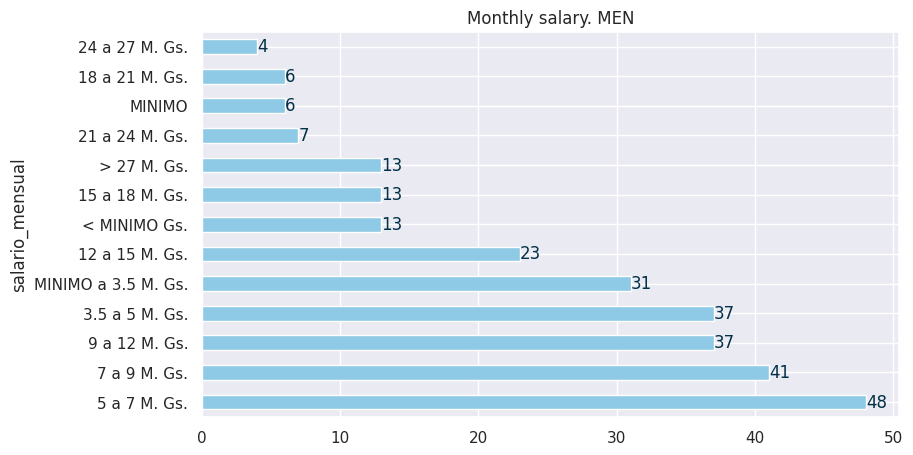

In [70]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

rects = (
    genero.get_group("HOMBRE")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(kind="barh", title="Monthly salary. MEN", color=color_hombres_light)
)


for k, v in enumerate(
    genero.get_group("HOMBRE")["salario_mensual"].value_counts(normalize=False).values
):
    rects.annotate(v, (v, k), va="center", color=color_hombres_dark)
plt.show()

### MUJERES

In [71]:
genero.get_group("MUJER")["salario_mensual"].value_counts()

salario_mensual
5 a 7 M. Gs.           12
7 a 9 M. Gs.            8
MINIMO a 3.5 M. Gs.     7
3.5 a 5 M. Gs.          7
9 a 12 M. Gs.           7
12 a 15 M. Gs.          3
MINIMO                  2
> 27 M. Gs.             2
18 a 21 M. Gs.          1
Name: count, dtype: int64

In [72]:
genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values

array([12,  8,  7,  7,  7,  3,  2,  2,  1])

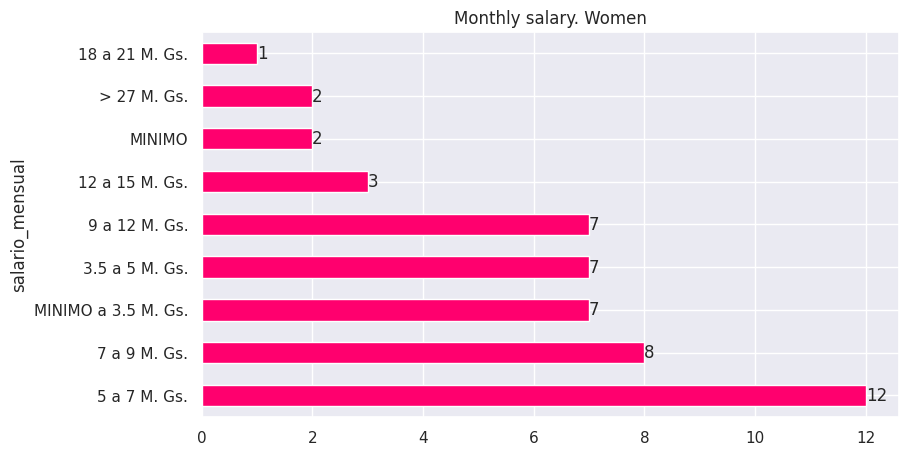

In [73]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

ret = (
    genero.get_group("MUJER")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Monthly salary. Women",
        color=color_mujeres_dark,
    )
)
for k, v in enumerate(
    genero.get_group("MUJER")["salario_mensual"].value_counts(normalize=False).values
):
    ret.annotate(
        v,
        (v, k),
        va="center",
    )
plt.show()

### NO DEFINIDO

In [74]:
genero.get_group("NO COMPARTO")["salario_mensual"].value_counts()

salario_mensual
3.5 a 5 M. Gs.         1
5 a 7 M. Gs.           1
> 27 M. Gs.            1
MINIMO a 3.5 M. Gs.    1
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
Name: count, dtype: int64

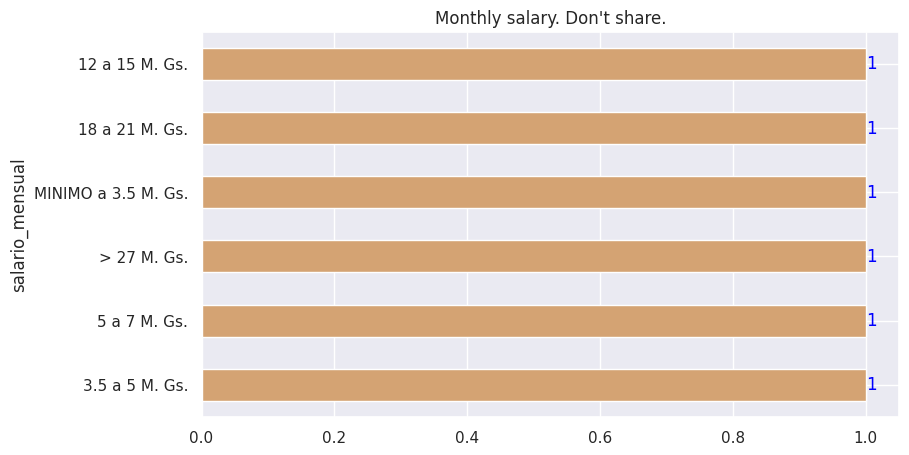

In [75]:
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)

nc = (
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .plot(
        kind="barh",
        title="Monthly salary. Don't share.",
        color=color_neutro_light,
    )
)


for k, v in enumerate(
    genero.get_group("NO COMPARTO")["salario_mensual"]
    .value_counts(normalize=False)
    .values
):
    nc.annotate(v, (v, k), va="center", color="blue")
plt.show()

### GENERO HOMBRES VS MUJERES

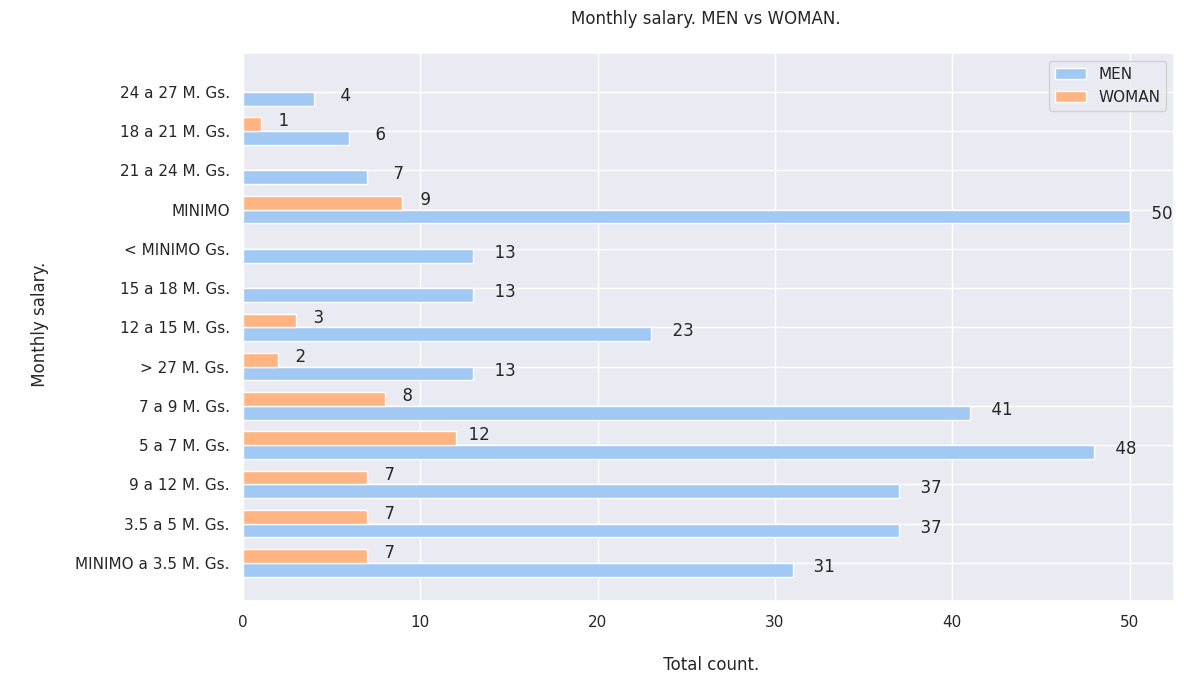

In [115]:
group_config = {
    "title": "Monthly salary. MEN vs WOMAN. \n",
    "c1_label": "MEN",
    "c2_label": "WOMAN",
    "xlabel": "\n Monthly salary.\n",
    "ylabel": "\n Total count.",
}

make_horizontal_grouped_chart(
    df,
    genero.get_group("HOMBRE").fillna(""),
    genero.get_group("MUJER").fillna(""),
    "salario_mensual",
    get_column_uniques(df, "salario_mensual"),
    group_config,
)

### SALARIO  SEGUN experiencia_en_ti 

In [77]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [78]:
exp = df.groupby("exp_en_IT")

In [79]:
exp_keys = exp.groups.keys()

In [80]:
make_df(df, "exp_en_IT", "category", "count")

,category,count
0,35-39,2
1,45-49,1
2,20-24,9
3,5-9,124
4,<5,94
5,>50,1
6,10-14,82
7,30-34,4
8,15-19,20
9,25-29,5


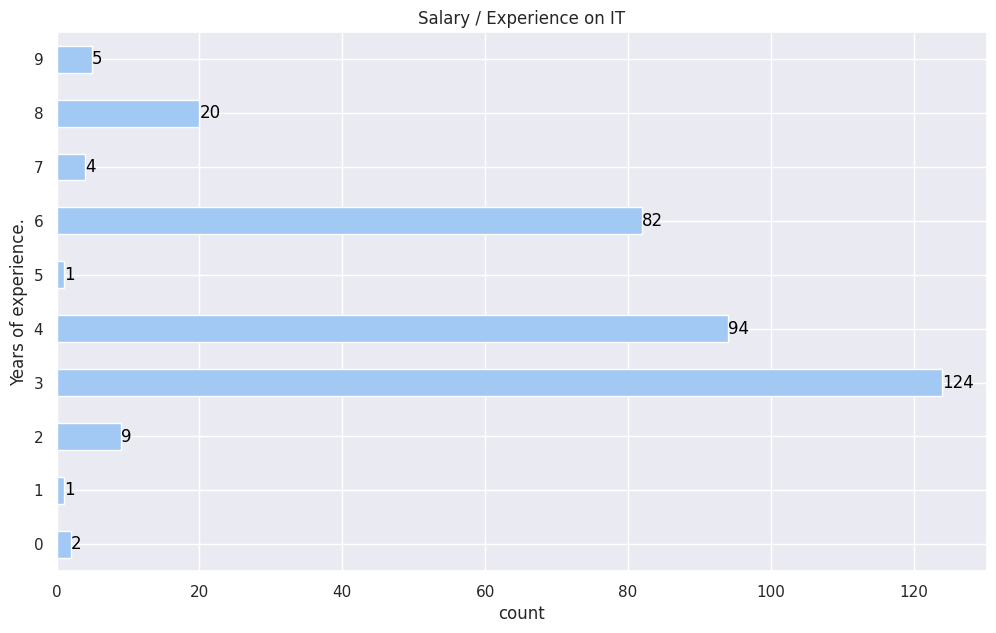

In [122]:
exp_it_df = make_df(df, "exp_en_IT", "category", "count")
c = [i for i in exp_it_df["count"]]

exp_it_plot = exp_it_df.plot(
    kind="barh",
    title="Salary / Experience on IT",
    ylabel="Years of experience.",
    xlabel="count",
    legend=False,
)


for k, v in enumerate(c):
    exp_it_plot.annotate(v, (v, k), va="center", color="black")

In [123]:
for i in exp_keys:
    print("Years of experience: ", i)
    g = exp.get_group(i)
    print(make_df(g, "salario_mensual", "category", "count"))
    print("\n" * 4)

Years of experience:  10-14
               category  count
0   MINIMO a 3.5 M. Gs.      1
1        3.5 a 5 M. Gs.      6
2         9 a 12 M. Gs.     18
3          5 a 7 M. Gs.      9
4          7 a 9 M. Gs.     12
5           > 27 M. Gs.      7
6        12 a 15 M. Gs.     15
7        15 a 18 M. Gs.      6
8        21 a 24 M. Gs.      3
9        18 a 21 M. Gs.      4
10       24 a 27 M. Gs.      1





Years of experience:  15-19


/home/torrezmn/Documentos/Data_Science/Enc_Devs_Py/Notebooks/toolkit/tools.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)
/home/torrezmn/Documentos/Data_Science/Enc_Devs_Py/Notebooks/toolkit/tools.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)


              category  count
0  MINIMO a 3.5 M. Gs.      1
1       3.5 a 5 M. Gs.      1
2        9 a 12 M. Gs.      3
3         5 a 7 M. Gs.      3
4         7 a 9 M. Gs.      5
5          > 27 M. Gs.      1
6       15 a 18 M. Gs.      2
7       12 a 15 M. Gs.      4





Years of experience:  20-24
         category  count
0  3.5 a 5 M. Gs.      2
1    5 a 7 M. Gs.      1
2    7 a 9 M. Gs.      1
3     > 27 M. Gs.      1
4  15 a 18 M. Gs.      2
5  12 a 15 M. Gs.      1
6  21 a 24 M. Gs.      1





Years of experience:  25-29
         category  count
0  21 a 24 M. Gs.      2
1   9 a 12 M. Gs.      1
2    5 a 7 M. Gs.      1
3     > 27 M. Gs.      1





Years of experience:  30-34
        category  count
0   < MINIMO Gs.      1
1  9 a 12 M. Gs.      1
2   5 a 7 M. Gs.      1
3    > 27 M. Gs.      1





Years of experience:  35-39
         category  count
0  21 a 24 M. Gs.      1
1  12 a 15 M. Gs.      1





Years of experience:  45-49
      category  count
0  > 27 M. Gs.      1



/home/torrezmn/Documentos/Data_Science/Enc_Devs_Py/Notebooks/toolkit/tools.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)
/home/torrezmn/Documentos/Data_Science/Enc_Devs_Py/Notebooks/toolkit/tools.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(False)
/home/torrezmn/Documentos/Data_Science/Enc_Devs_Py/Notebooks/toolkit/tools.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[


### SALARIO X educación



In [83]:
ed_uniques = get_column_uniques(df, "educacion")

In [84]:
for i in ed_uniques:
    print("Educacion vs. Salario : ", i)
    print("==================================")
    print(df[df["educacion"] == i]["salario_mensual"].value_counts())
    print("\n" * 5)

Educacion vs. Salario :  Autodidacta
salario_mensual
MINIMO a 3.5 M. Gs.    2
Name: count, dtype: int64






Educacion vs. Salario :  Ed. Secundaria
salario_mensual
3.5 a 5 M. Gs.         4
< MINIMO Gs.           3
5 a 7 M. Gs.           2
12 a 15 M. Gs.         1
7 a 9 M. Gs.           1
MINIMO a 3.5 M. Gs.    1
Name: count, dtype: int64






Educacion vs. Salario :  Ed. Universitaria
salario_mensual
7 a 9 M. Gs.           32
5 a 7 M. Gs.           30
9 a 12 M. Gs.          25
3.5 a 5 M. Gs.         14
MINIMO a 3.5 M. Gs.    13
12 a 15 M. Gs.         13
MINIMO                  4
21 a 24 M. Gs.          4
15 a 18 M. Gs.          4
> 27 M. Gs.             4
18 a 21 M. Gs.          3
< MINIMO Gs.            3
24 a 27 M. Gs.          2
Name: count, dtype: int64






Educacion vs. Salario :  Ed. Basica
Series([], Name: count, dtype: int64)






Educacion vs. Salario :  Master
salario_mensual
12 a 15 M. Gs.         4
5 a 7 M. Gs.           3
> 27 M. Gs.            2
15 a 18 M. Gs.      

In [85]:
ed_groups = df.groupby("educacion")

### carreras_o_especialidades


In [88]:
esp = get_column_uniques(df, "carr_especialidades")

<Axes: title={'center': 'Careers or specialties.'}, xlabel='Total', ylabel='Career/Specialtie'>

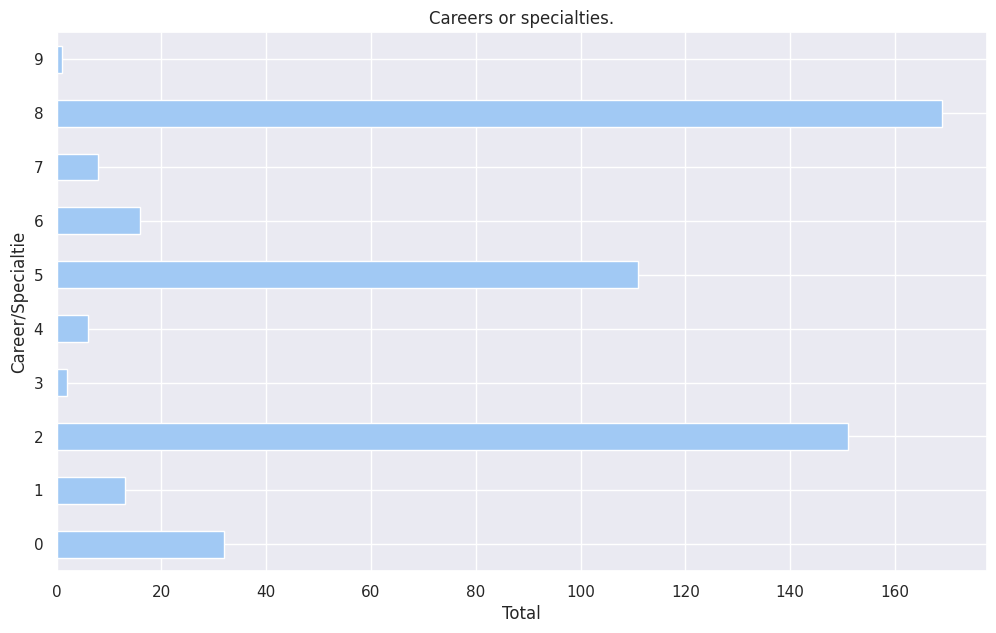

In [126]:
make_df(df, "carr_especialidades", "category", "count").plot(
    kind="barh",
    title="Careers or specialties.",
    ylabel="Career/Specialtie",
    xlabel="Total",
    legend=False,
)

In [91]:
for i in esp:
    esp_df = df[df["carr_especialidades"].str.contains(i)]
    print("Especialidad : {0} / Total : {1}".format(i, esp_df.shape[0]))
    print("=" * 40)
    print(esp_df["salario_mensual"].value_counts())
    print("\n" * 4)

Especialidad : Otras / Total : 32
salario_mensual
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: count, dtype: int64





Especialidad : Diseño Gráfico / Total : 13
salario_mensual
5 a 7 M. Gs.           4
9 a 12 M. Gs.          2
< MINIMO Gs.           2
21 a 24 M. Gs.         1
> 27 M. Gs.            1
MINIMO a 3.5 M. Gs.    1
7 a 9 M. Gs.           1
12 a 15 M. Gs.         1
Name: count, dtype: int64





Especialidad : Análisis de Sist. / Total : 151
salario_mensual
5 a 7 M. Gs.           26
9 a 12 M. Gs.          25
3.5 a 5 M. Gs.         24
7 a 9 M. Gs.           24
MINIMO a 3.5 M. Gs.    13
12 a 15 M. Gs.         12
21 a 24 M. Gs.          6
18 a 21 M. Gs.          5
> 27 M. Gs.             5
MINIMO                  4
< MINIMO Gs.            4
15 a 

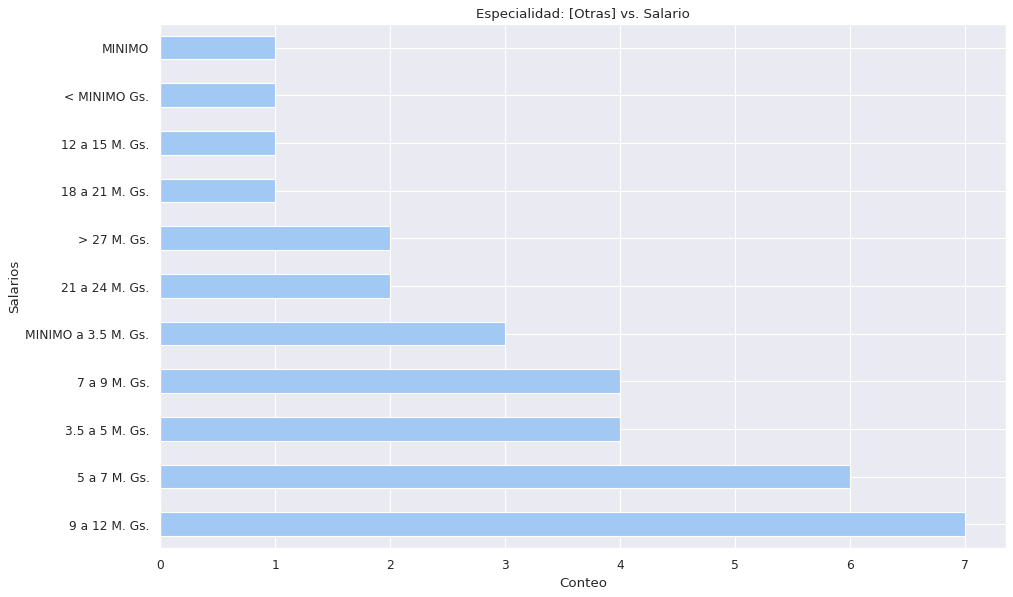

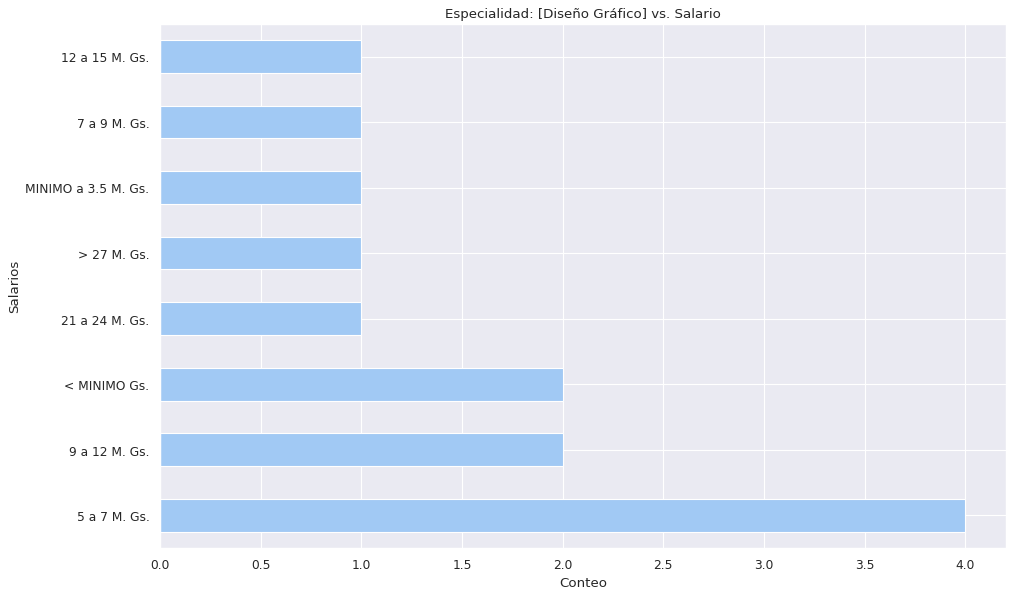

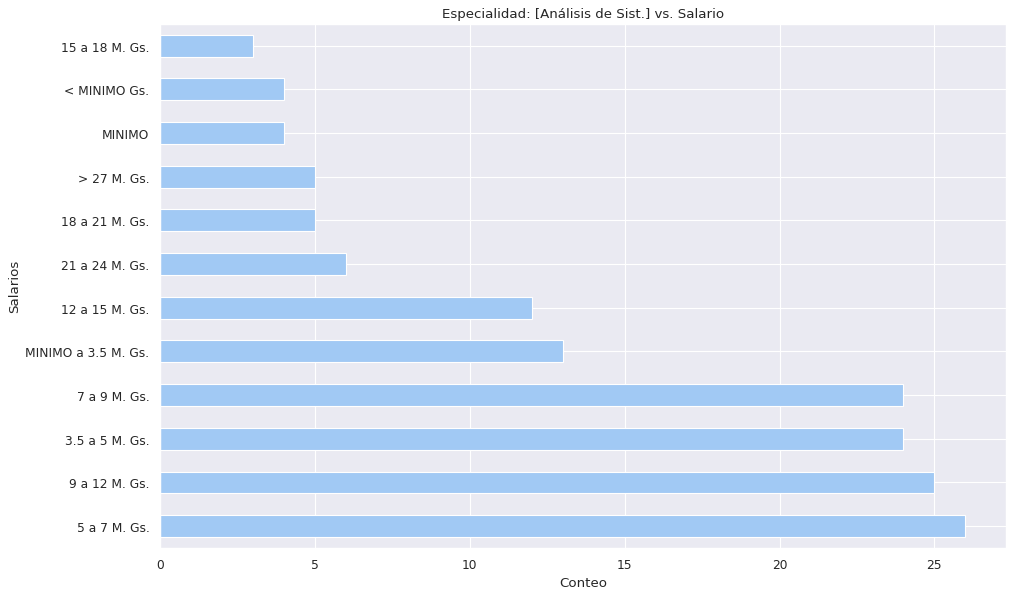

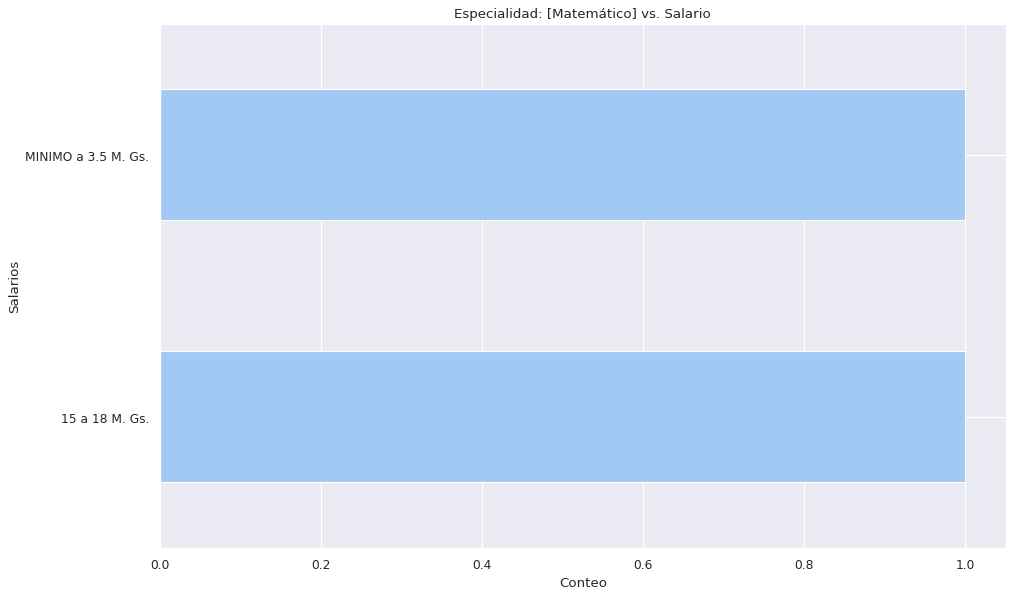

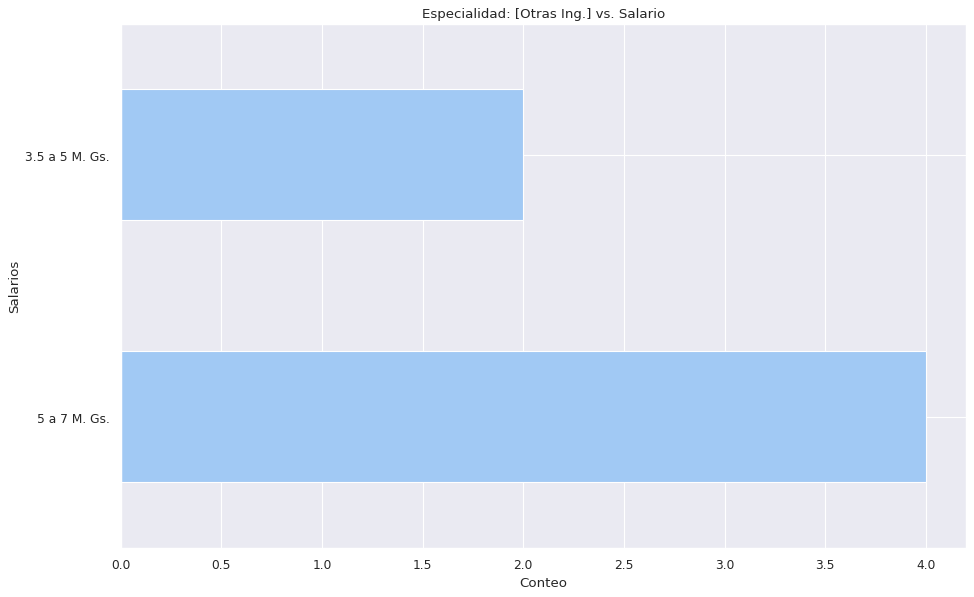

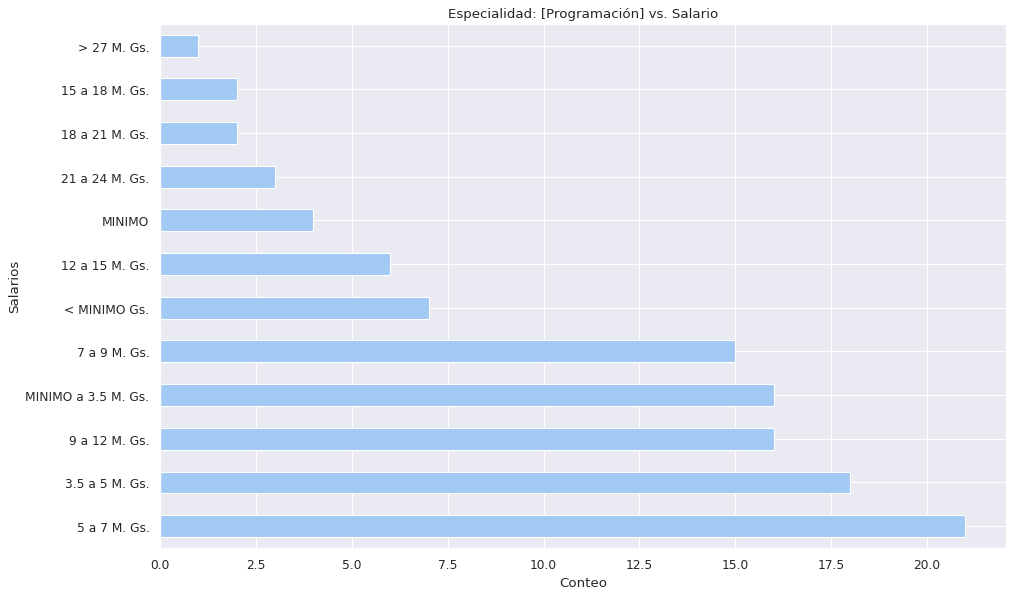

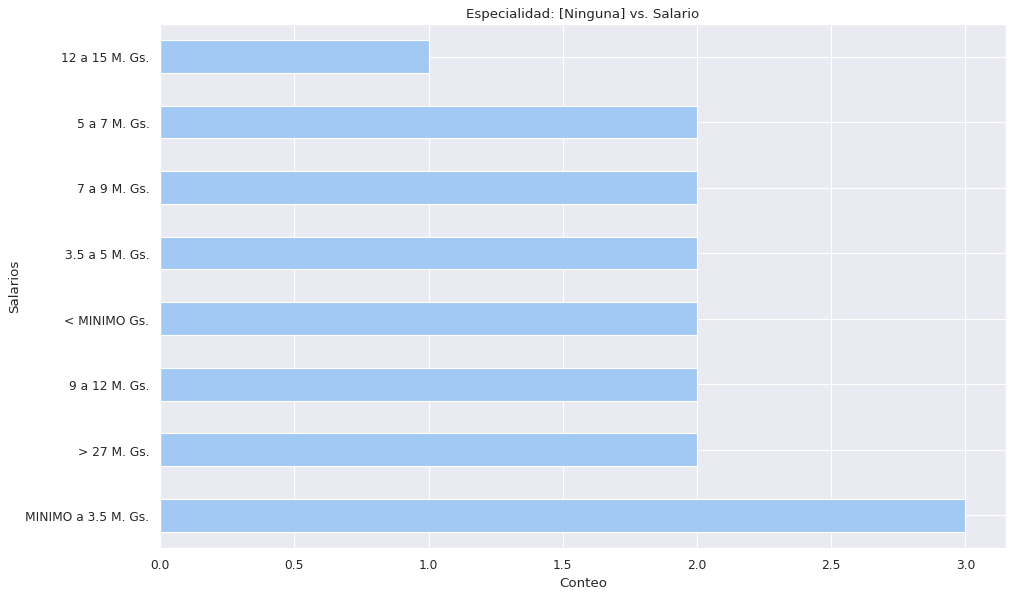

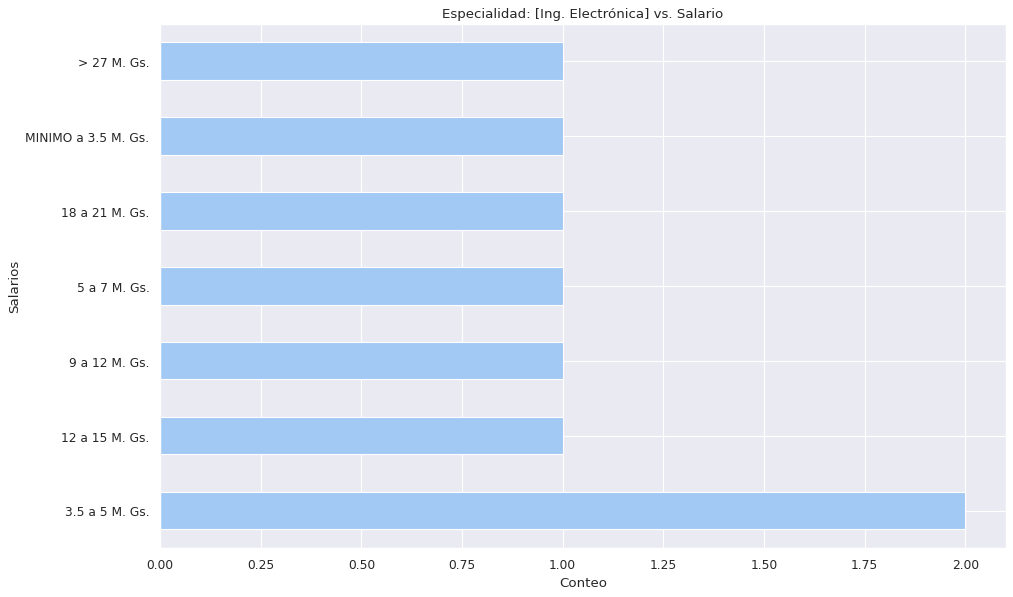

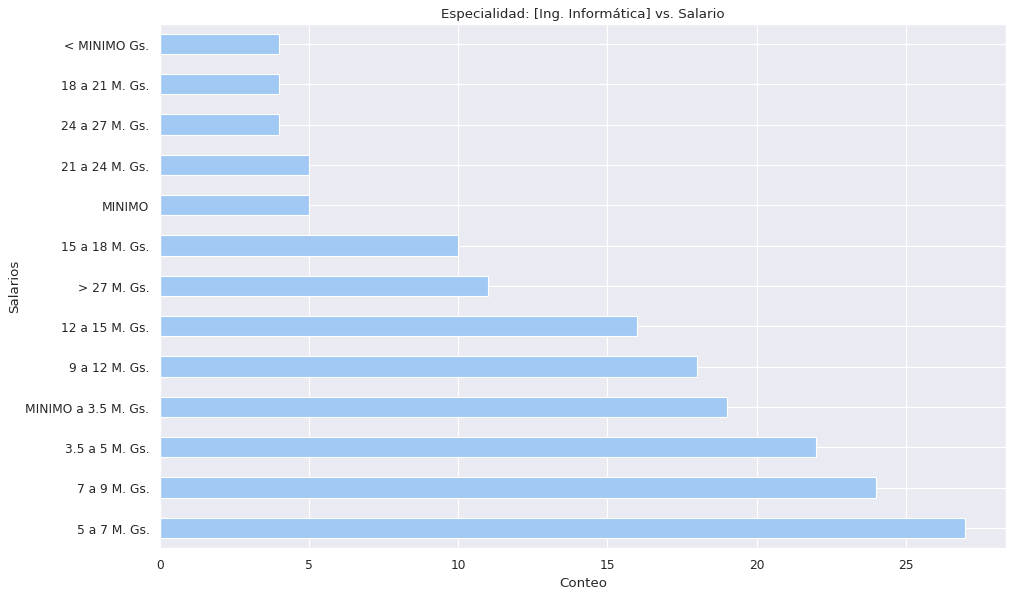

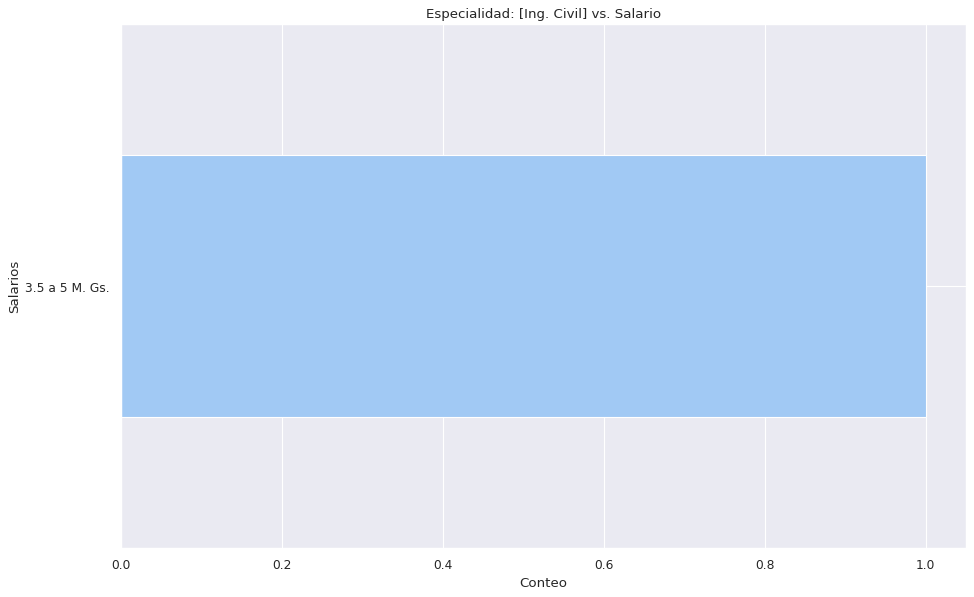

<Figure size 1200x700 with 0 Axes>

In [134]:
for k, v in enumerate(esp):
    plt.figure(figsize=(30, 80), dpi=80)
    plt.subplot(8, 2, k + 1)
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    mod = aux_df.plot(
        kind="barh",
        title="Especialidad: [{0}] vs. Salario".format(v),
        legend=False,
        ylabel="Salarios",
        xlabel="Conteo",
    )
    plt.show()


plt.subplots_adjust(left=0.6, bottom=0.1, right=1, top=0.9, wspace=0.5, hspace=0.6)

In [93]:
for k, v in enumerate(esp):
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    print("ESPECIALIDAD : ", v)
    print("=" * 20)
    print(aux_df)
    print("\n" * 3)

ESPECIALIDAD :  Otras
salario_mensual
9 a 12 M. Gs.          7
5 a 7 M. Gs.           6
3.5 a 5 M. Gs.         4
7 a 9 M. Gs.           4
MINIMO a 3.5 M. Gs.    3
21 a 24 M. Gs.         2
> 27 M. Gs.            2
18 a 21 M. Gs.         1
12 a 15 M. Gs.         1
< MINIMO Gs.           1
MINIMO                 1
Name: count, dtype: int64




ESPECIALIDAD :  Diseño Gráfico
salario_mensual
5 a 7 M. Gs.           4
9 a 12 M. Gs.          2
< MINIMO Gs.           2
21 a 24 M. Gs.         1
> 27 M. Gs.            1
MINIMO a 3.5 M. Gs.    1
7 a 9 M. Gs.           1
12 a 15 M. Gs.         1
Name: count, dtype: int64




ESPECIALIDAD :  Análisis de Sist.
salario_mensual
5 a 7 M. Gs.           26
9 a 12 M. Gs.          25
3.5 a 5 M. Gs.         24
7 a 9 M. Gs.           24
MINIMO a 3.5 M. Gs.    13
12 a 15 M. Gs.         12
21 a 24 M. Gs.          6
18 a 21 M. Gs.          5
> 27 M. Gs.             5
MINIMO                  4
< MINIMO Gs.            4
15 a 18 M. Gs.          3
Name: count, dtype

# Especialidad vs Años de experiencia vs salario

In [94]:
punto = df.groupby(["carr_especialidades", "exp_en_IT"])

In [95]:
for k, v in enumerate(punto.groups.keys()):
    aux_df = punto.get_group(v)["salario_mensual"].value_counts()
    print("=" * 40)
    print("Especialidad. Años de experiencia. Salarios.  / {0}".format(v))
    print("=" * 40)
    print(aux_df)
    print("\n" * 4)

Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '10-14')
salario_mensual
12 a 15 M. Gs.    5
9 a 12 M. Gs.     4
7 a 9 M. Gs.      4
21 a 24 M. Gs.    2
5 a 7 M. Gs.      1
18 a 21 M. Gs.    1
15 a 18 M. Gs.    1
> 27 M. Gs.       1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '15-19')
salario_mensual
7 a 9 M. Gs.           2
9 a 12 M. Gs.          1
5 a 7 M. Gs.           1
MINIMO a 3.5 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '20-24')
salario_mensual
3.5 a 5 M. Gs.    1
12 a 15 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '35-39')
salario_mensual
12 a 15 M. Gs.    1
Name: count, dtype: int64





Especialidad. Años de experiencia. Salarios.  / ('Análisis de Sist.', '5-9')
salario_mensual
5 a 7 M. Gs.           7
7 a 9 M. Gs.           7
9 a 12 M. Gs.          7
3.5 a 5 

In [96]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [97]:
get_column_uniques(df, "tipo_de_trabajo")

['Dev front-end',
 'Aps para Esc. o Emp.',
 'QA o testing',
 'Dev de videojuegos',
 'Dev back-end',
 'Project Lead',
 'Dev mobile',
 'Dev de sist. embebidos',
 'Dev full-stack',
 'DB Admin']

In [98]:
tipo_trabajo_group = df.groupby(["tipo_de_trabajo", "exp_en_IT"])

In [99]:
t = get_column_uniques(df, "tipo_de_trabajo")

In [100]:
for i in t:
    g = df[df["tipo_de_trabajo"].str.contains(i)].groupby("exp_en_IT")
    for j in g.groups.keys():
        p = g.get_group(j)["salario_mensual"].value_counts()
        print("grupo -> ", i)
        print("años -> ", j)
        print("----------------------> \n", p)
        print("\n" * 2)

grupo ->  Dev front-end
años ->  10-14
----------------------> 
 salario_mensual
5 a 7 M. Gs.      5
3.5 a 5 M. Gs.    4
7 a 9 M. Gs.      4
15 a 18 M. Gs.    3
18 a 21 M. Gs.    2
9 a 12 M. Gs.     2
12 a 15 M. Gs.    2
21 a 24 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev front-end
años ->  15-19
----------------------> 
 salario_mensual
7 a 9 M. Gs.     2
9 a 12 M. Gs.    1
5 a 7 M. Gs.     1
Name: count, dtype: int64



grupo ->  Dev front-end
años ->  20-24
----------------------> 
 salario_mensual
3.5 a 5 M. Gs.    1
21 a 24 M. Gs.    1
12 a 15 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev front-end
años ->  25-29
----------------------> 
 salario_mensual
21 a 24 M. Gs.    2
9 a 12 M. Gs.     1
> 27 M. Gs.       1
Name: count, dtype: int64



grupo ->  Dev front-end
años ->  30-34
----------------------> 
 salario_mensual
9 a 12 M. Gs.    1
Name: count, dtype: int64



grupo ->  Dev front-end
años ->  35-39
----------------------> 
 salario_mensual
21 a 24 M. Gs

In [101]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [102]:
get_column_uniques(df, "modalidad")

['Ninguna', 'Hibrído', 'Remoto', 'Presencial']

In [103]:
get_column_uniques(df, "trabajo")

['Ambas', 'Internacional', 'Nacional (Paraguay)']

# modalidad y trabajo som lo mismo?

In [139]:
df["modalidad_de_trabajo"] = df["modalidad"] + df["trabajo"]

<Axes: ylabel='modalidad_de_trabajo'>

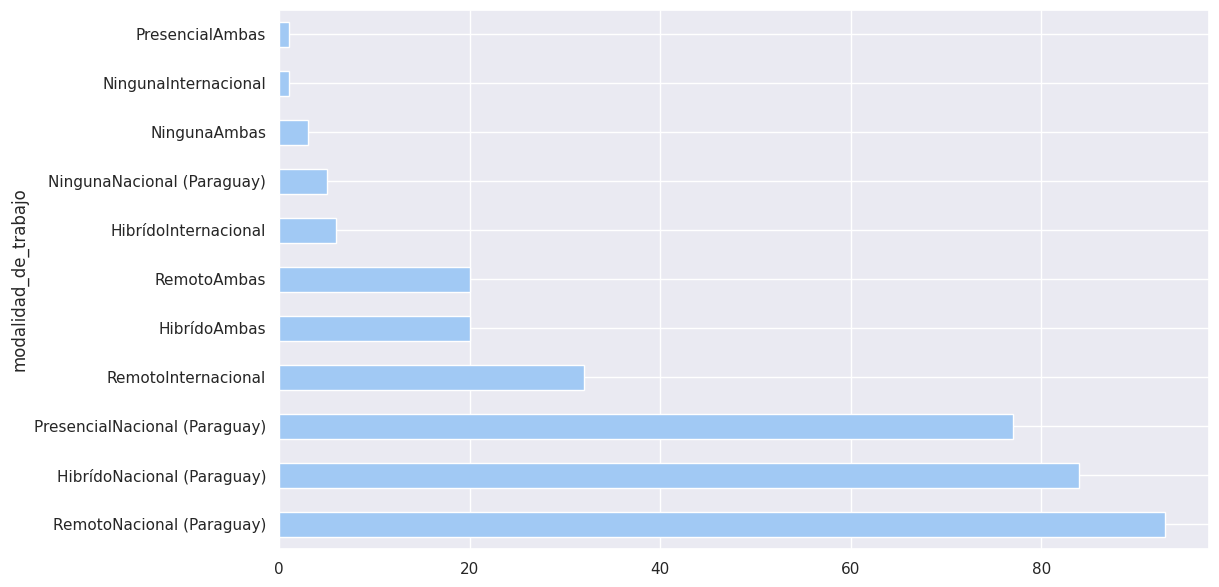

In [105]:
df["modalidad_de_trabajo"].value_counts().plot(kind="barh")

In [107]:
g_modalidad = df.groupby(["modalidad_de_trabajo", "salario_mensual"])

In [108]:
for i in g_modalidad.groups:
    print("Grupo -> ", i)
    print("=" * 34)
    d = g_modalidad.get_group(i)["tipo_de_trabajo"].value_counts(normalize=False)
    print(d)
    print("\n" * 4)

Grupo ->  ('HibrídoAmbas', '12 a 15 M. Gs.')
tipo_de_trabajo
Dev back-end                                                   1
Dev full-stack;Dev mobile;Aps para Esc. o Emp.;Project Lead    1
DB Admin                                                       1
Dev full-stack;Dev mobile;DB Admin                             1
Dev front-end                                                  1
Dev back-end;Project Lead                                      1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '15 a 18 M. Gs.')
tipo_de_trabajo
Dev back-end;Dev front-end;Dev full-stack;QA o testing;DB Admin;Project Lead    1
Dev back-end;Dev full-stack                                                     1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '18 a 21 M. Gs.')
tipo_de_trabajo
Dev full-stack                          1
Dev full-stack;DB Admin;Project Lead    1
Name: count, dtype: int64





Grupo ->  ('HibrídoAmbas', '24 a 27 M. Gs.')
tipo_de_trabajo
Project Lead    1
Name: c

In [110]:
df["framworks"] = (
    df["lib_frameworks"].fillna("") + " " + df["otras_lib_frameworks"].fillna("")
)

In [111]:
fram_uniques = get_column_uniques(df, "framworks")

In [112]:
for i in fram_uniques:
    d = df[df["framworks"].str.contains(i)]
    g = d.groupby(["trabajo", "exp_en_IT"])
    for j in g.groups.keys():
        print("Framework : {0} / Salario: {1}".format(i, j))
        print("=" * 44)
        print(g.get_group(j)["salario_mensual"].value_counts())
        print("\n" * 3)

Framework : JQuery Unity 3D / Salario: ('Internacional', '<5')
salario_mensual
< MINIMO Gs.    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Ambas', '10-14')
salario_mensual
12 a 15 M. Gs.    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Ambas', '35-39')
salario_mensual
21 a 24 M. Gs.    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Ambas', '<5')
salario_mensual
MINIMO    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Internacional', '10-14')
salario_mensual
> 27 M. Gs.    2
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Internacional', '15-19')
salario_mensual
> 27 M. Gs.     1
7 a 9 M. Gs.    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Internacional', '<5')
salario_mensual
> 27 M. Gs.    1
Name: count, dtype: int64




Framework : Ruby on Rails Node.js / Salario: ('Nacional (Paraguay)', '10-